<h1>Exploratory Data Analysis<span class="tocSkip"></span></h1>

<h3>Introduction<span class="tocSkip"></span></h3>

Having loaded all the data, I will now explore it to find more information about the domain and the data, and to help build models.

This notebook starts by exploring insights comparing privacy policies and then looking across all segments together.  These are mostly domain-related insights with some relevance for modelling.  

Then the notebook explores the distribution of annotations within the dataset.

I will load data already generated and make some manipulations to find more insights where appropriate.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Terminology" data-toc-modified-id="Terminology-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Terminology</a></span></li></ul></li><li><span><a href="#Top-level:-how-are-policies-different?-How-are-the-policies-in-the-dataset-distributed?" data-toc-modified-id="Top-level:-how-are-policies-different?-How-are-the-policies-in-the-dataset-distributed?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Top level: how are policies different? How are the policies in the dataset distributed?</a></span><ul class="toc-item"><li><span><a href="#What-is-the-Train/Validate/Test-split?" data-toc-modified-id="What-is-the-Train/Validate/Test-split?-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>What is the Train/Validate/Test split?</a></span></li><li><span><a href="#How-many-policies-contain-synthetic-data?" data-toc-modified-id="How-many-policies-contain-synthetic-data?-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>How many policies contain synthetic data?</a></span></li><li><span><a href="#How-many-paragraphs-to-policies-tend-to-have?" data-toc-modified-id="How-many-paragraphs-to-policies-tend-to-have?-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>How many paragraphs to policies tend to have?</a></span></li><li><span><a href="#How-many-characters-do-policies-have?" data-toc-modified-id="How-many-characters-do-policies-have?-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>How many characters do policies have?</a></span></li></ul></li><li><span><a href="#Analysis-of-text-aggregated-across-all-policies" data-toc-modified-id="Analysis-of-text-aggregated-across-all-policies-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Analysis of text aggregated across all policies</a></span><ul class="toc-item"><li><span><a href="#How-many-words-do-the-segments-have?" data-toc-modified-id="How-many-words-do-the-segments-have?-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>How many words do the segments have?</a></span></li><li><span><a href="#What-are-the-most-common-stopwords?" data-toc-modified-id="What-are-the-most-common-stopwords?-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>What are the most common stopwords?</a></span></li><li><span><a href="#What-are-the-most-common-words?" data-toc-modified-id="What-are-the-most-common-words?-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>What are the most common words?</a></span></li><li><span><a href="#What-are-the-most-common-phrases?" data-toc-modified-id="What-are-the-most-common-phrases?-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>What are the most common phrases?</a></span></li></ul></li><li><span><a href="#Distribution-of-targets-in-the-data" data-toc-modified-id="Distribution-of-targets-in-the-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Distribution of targets in the data</a></span><ul class="toc-item"><li><span><a href="#Frequency-of-concatenated-targets" data-toc-modified-id="Frequency-of-concatenated-targets-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Frequency of concatenated targets</a></span></li><li><span><a href="#Which-party_practice-annotations-are-most-regularly-applied?" data-toc-modified-id="Which-party_practice-annotations-are-most-regularly-applied?-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Which party_practice annotations are most regularly applied?</a></span></li><li><span><a href="#How-is-the-distribution-of-the-frequencies-of-concatentated-targets?" data-toc-modified-id="How-is-the-distribution-of-the-frequencies-of-concatentated-targets?-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>How is the distribution of the frequencies of concatentated targets?</a></span></li><li><span><a href="#Focussing-on-just-a-few-concatenated-targets-of-interest-–-how-many-policies-mention-them?" data-toc-modified-id="Focussing-on-just-a-few-concatenated-targets-of-interest-–-how-many-policies-mention-them?-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Focussing on just a few concatenated targets of interest – how many policies mention them?</a></span></li><li><span><a href="#What-are-the-phrases-most-associated-with-practices-of-interest?" data-toc-modified-id="What-are-the-phrases-most-associated-with-practices-of-interest?-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>What are the phrases most associated with practices of interest?</a></span></li><li><span><a href="#Number-of-sentences-with-these-annotations" data-toc-modified-id="Number-of-sentences-with-these-annotations-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Number of sentences with these annotations</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Appendix" data-toc-modified-id="Appendix-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Appendix</a></span><ul class="toc-item"><li><span><a href="#Wordcloud" data-toc-modified-id="Wordcloud-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Wordcloud</a></span></li><li><span><a href="#Most-frequent-words-taking-into-account-term-frequency-and-document-frequency" data-toc-modified-id="Most-frequent-words-taking-into-account-term-frequency-and-document-frequency-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Most frequent words taking into account term frequency and document frequency</a></span></li></ul></li></ul></div>

## Terminology

**Terminology around the dataset:**

- Reminder that in this project, a "segment" is roughly equivalent to a paragraph
- Concatenated target – Annotations consist of a practice, the party, and a modality.  For some reason, Story et al. concatenated the party and practice annotation-types in the dataset, despite using separated types for classification. These concatenated targets are helpful for understanding with more depth how a company uses the data, and helpful for comparing whether a classification approach using them could be helpful.

**Terminology specific to natural language processing:**

- In natural language processing, the entire collection of all documents taken together is called the Corpus.

- Tokens: The specific elements that will be processed as variables for the model. The whole corpus will be split up into individual tokens. In the most basic way, tokens can be individual words, such as 'terrible' or 'hotel', but we will see more specific tokens.

- Vocabulary: Every unique token in the corpus.

**Vectorizing text**

For preprocessing of text data, we ultimately create a matrix where each row is a document and each column is a token, and the entries in the matrix represent how many times the token occurs in the document. So in our case, each row will be a review, and each token will be a word, word-element or combination of words. Each row will be filled in, mostly with 0s and some 1s, to indicate that those tokens are in the review. This typically generates an extremely sparse matrix and so a sparse matrix object is used. Populating the matrix involves describing each document as a vector represeting the tokens it contains, so this process is called vectorization.

**Tokenization**

The process of converting every word or element into tokens (which will be columns in the matrix) is called transforming each item into a token, aka tokenization. For our purposes, we won't include punctuation in our tokens because this would expand the corpus too widely without adding enough predictive power.

One thing to note is that similar words such as "loud" and "louder" can be combined into the same token, as they are likely to contain the same meaning. A method of grouping words in this way is to transform them into their 'stem' or 'lemma'. A stemming is a crude method to simply cut down the letters of the word. Lemmatization takes into account more context and is a more nuanced way to group words together.

Importing modules used:

In [1]:
import pandas as pd
from pandas import json_normalize
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm
import yaml
import sys
from collections import defaultdict
from collections import Counter

import priv_policy_manipulation_functions as priv_pol_funcs

To standardise and beautify matplotlib graphs:

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('seaborn')

# Top level: how are policies different? How are the policies in the dataset distributed?

Let's start by investigating the data at the level of policies.

In [3]:
all_policies_df = priv_pol_funcs.load_all_policies()
all_policies_df = priv_pol_funcs.add_metadata_to_policy_df(all_policies_df)

## What is the Train/Validate/Test split?

Does the Train/Validate/Test split match that specified by Story et al.?

In [4]:
all_policies_df["policy_type"].value_counts()

TRAINING      188
TEST          100
VALIDATION     62
Name: policy_type, dtype: int64

Yes.  I also note that the validate size is small and given that the amount of data is small, it may be worth having a slightly smaller test size to allow for bigger training data.

## How many policies contain synthetic data? 

As a reminder, synthetic text is text added by Story et al. to change segments stating that an action was performed to stating that the action was not performed. This was done to help train their negative classifier (a classifier to identify that an action was not performed).

In [5]:
all_policies_df["contains_synthetic"].value_counts()

False    208
True     142
Name: contains_synthetic, dtype: int64

Quite a lot contain synthetic data, so in any particular segment we read, there is a good chance it is not the original text. How is the synthetic data spread throughout the Train, Test and Validate policies?

In [6]:
type_synthetic_dist = all_policies_df[["policy_type", "contains_synthetic"]].value_counts().unstack()
type_synthetic_dist

contains_synthetic,False,True
policy_type,,
TEST,100.0,NaN
TRAINING,82.0,106.0
VALIDATION,26.0,36.0


None of the test data has synthetic values, which makes sense because we need to test on real data.  It looks like the synthetic information is fairly split between Training and Validation, each having slightly more policies that does contain synthetic text than does not.

## How many paragraphs to policies tend to have?

How many segments (similar to paragraphs) do the policies have?  My initial expectations were that there are a lot because policies tend to be long and unreadable.

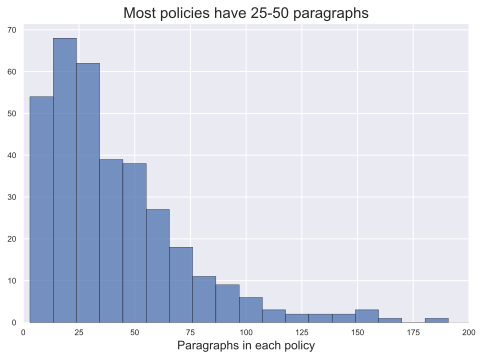

In [7]:
sns.histplot(data=all_policies_df["num_segments"])
plt.xlim(0,200)
plt.xticks(fontsize=8)
plt.xlabel("Paragraphs in each policy", fontsize=12)
plt.ylabel("")
plt.yticks(fontsize=8)
plt.title("Most policies have 25-50 paragraphs", fontsize=15)
plt.show()

It would be nice to know that some privacy policies are quick and easy to read. However, using information from Story et al. plus my own manual inspection of the dataset, I know that some of the app policies are shorter out of negligence – not properly detailing what the company actually does with the user data.  The longer policies are from big companies with legal teams who do a lot and must protect themselves by carefully specifying everything.

Also, many policies are around 25-50 paragraphs because the small company have found standard policy templates and replicated them, and that is the length of the templates.

So the above graph is a proxy for the distribution of the company size.

## How many characters do policies have?

Again I would expect this to be quite long (say above 10K) since privacy policies tend to be long.

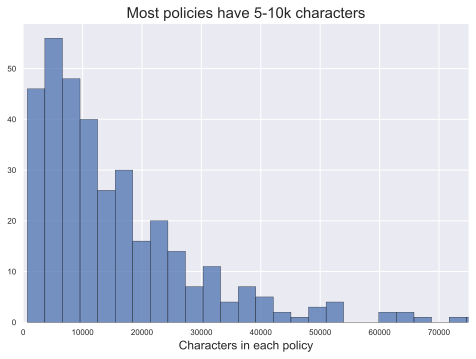

In [8]:
sns.histplot(data=all_policies_df["total_characters"], bins=70)
plt.title("Most policies have 5-10k characters", fontsize=15)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlim(0,75000)
plt.ylabel("")
plt.xlabel("Characters in each policy", fontsize=12)
plt.show()

Note that I cut the graph short since there were a handful of outliers.

This is generally shorter than I expected, and my explanation for this is similar to why there are many companies with less paragraphs.

Generally I think my perceptions of long privacy policies is because most of my interactions with policies have been with big companies, so I did not realise that in fact most companies are small companies and do not have a well-fleshed-out policy.

---

# Analysis of text aggregated across all policies

For this, I will load in the data that breaks the text down to the segment level.

In [9]:
all_segments_df = pd.read_pickle('objects/all_segments_df.pkl')

For text processing, I will look at every word.

In [10]:
lists_of_words = all_segments_df['segment_text'].str.split(' ')

In [108]:
# Can be used for demonstration and verification of the lists_of_words object
#lists_of_words

## How many words do the segments have?

Based on the above results I don't expect particularly long segments.

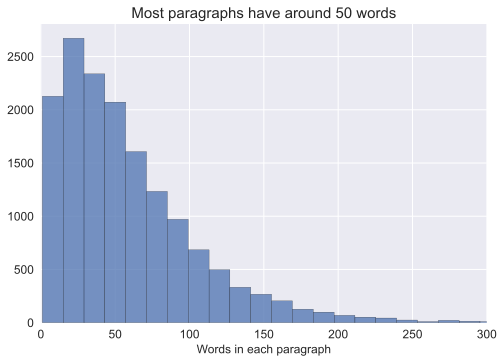

In [12]:
sns.histplot( lists_of_words.str.len(), bins = 200 )
plt.xlim(0, 300)
plt.title("Most paragraphs have around 50 words", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("")
plt.xlabel("Words in each paragraph", fontsize=12)
plt.show()

Graph cut off to remove outliers – the graph has a very long tail with outliers stretching to over 2000 words per paragraph.

Having manually browsed some of the data, I know that one factor contributing to a smaller average segment length is that individual bullet points are split up as segments.  So a list of bullet points could have very few words per segment.

This has an implication for modelling – Story et al. train their classifiers at the segment level, but the length of segments varies greatly.  To help standardize this, smaller segments could be grouped together or the training could be done at sentence level.

## What are the most common stopwords?

A stopword is a name given to words that carry little meaning for the context, such as grammatical fillers like "the", "it" etc. They are some of the most common words in English but will have extremely weak predictive power for our categorisation and so it makes sense to remove them from the whole vocabulary when modelling.

Some libraries have a built-in stopwords list, which makes it easier to remove them. SKLearn Count Vectorizer has a list of stopwords that it can refer to and so does the nltk library nltk.corpus.

Some manipulation is required to get this data.

In [13]:
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))

In [14]:
# Create corpus
corpus = []
lists_of_words2 = lists_of_words.values.tolist() # list of words
# converts the series into an array and then into a list of lists
corpus = [word for i in lists_of_words2 for word in i] # add every individual word to the corpus 
# going two layers into the list of lists with list comprehension

In [15]:
corpus_lower = [word.lower() for word in corpus]
len(corpus_lower)

936272

There are 936272 words in total.

Using defaultdict to count the frequency of each stopword:

In [16]:
stopword_dict = defaultdict(int)
for word in corpus_lower:
    if word in stop:
        stopword_dict[word] += 1 

Plotting the top stopwords:

In [17]:
top_words = sorted(stopword_dict.items(), key=lambda x:x[1],reverse=True)[:10]
each_stopword, stopword_count = zip(*top_words) # *top expands the list of top 10 tuples

# These lines of code inspired from neptune.ai. Annotations mine.  https://app.neptune.ai/neptune-ai/eda-nlp-tools/n/0-0-eda-nlp-million-headlines-f42d5ffd-0a6c-47f5-8cb8-bcddc93bf5e7/. Annotations mine.

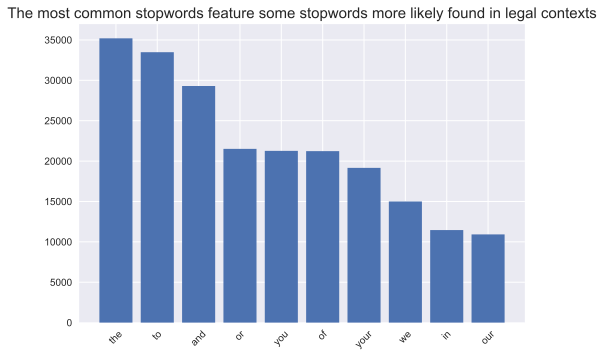

In [18]:
plt.figure()
plt.title("The most common stopwords feature some stopwords more likely found in legal contexts", fontsize=15)
plt.bar(each_stopword, stopword_count)
plt.xticks(rotation=45)
plt.show()

I think that "and" and "or" appear so highly because many legal sentences express lists, to ensure each meaning is understood.  "You" and "Your" also appear more often in legal texts.

It could be hard to see how these would be useful for predicting some of the targets though, so many of these will be removed for modelling.

---

## What are the most common words?

In [44]:
# These lines of code inspired from neptune.ai. Annotations mine. https://app.neptune.ai/neptune-ai/eda-nlp-tools/n/0-0-eda-nlp-million-headlines-f42d5ffd-0a6c-47f5-8cb8-bcddc93bf5e7/.

counter = Counter(corpus_lower) # makes a dictionary with all the words and total occurrences
most = counter.most_common() # ordered by most common words

common_words, common_word_freq = [], []
for word, count in most[:40]:
    if (word not in stop):
        common_words.append(word)
        common_word_freq.append(count)

I expect the most common words to be related to privacy policies.  I have also found in my experience that some words that seem like stopwords are not removed.

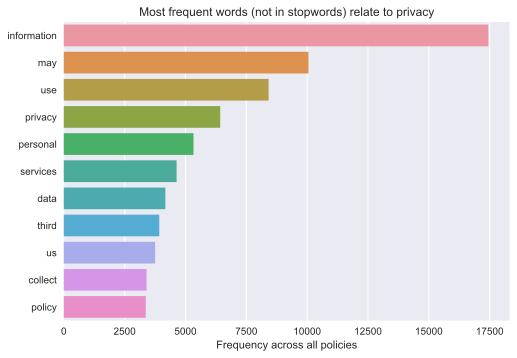

In [46]:
sns.barplot(x=common_word_freq, y=common_words)
plt.title("Most frequent words (not in stopwords) relate to privacy")
plt.xlabel("Frequency across all policies")
plt.show()

Information makes sense to be the most popular word.  All of these look as expected.  We can also see that lots of words that appear to be stopwords have been left in by the stopwords list.  This could be intended and helpful for our modelling: I will use bigrams for modelling and these could contain some extra meaning that could be helpful for predicting the target, for example "use services" could be more predictive of 3rd party practices. 

## What are the most common phrases?

I am predicting that the most common phrases are all legal jargon, but it will be interesting to see if there are any exceptions or specific phrases of interest.

To analyze phrases I will analyze n-grams. An n-gram is a contiguous sequence of n items from a given sample of text, where n is the number of items.  In this case, since the way I am tokenizing is mostly words, bi-grams are sequences of two words and 5-grams are 5-word phrases.  

I use a function from my privacy_policy_functions.

In [51]:
top_n_bigrams = priv_pol_funcs.get_top_ngrams(all_segments_df['segment_text'], 5, top_n=15)
x, y = map(list, zip(*top_n_bigrams)) # Re-arranging. 
# The * expands top_n_bigrams so that each bigram, freq tuple is passed as argument to zip
# Then zip will take the bigram from each and group them together, and the freq from each and group them together
# Then map applies the list function to both groups to make them both lists which can be passed to x and y

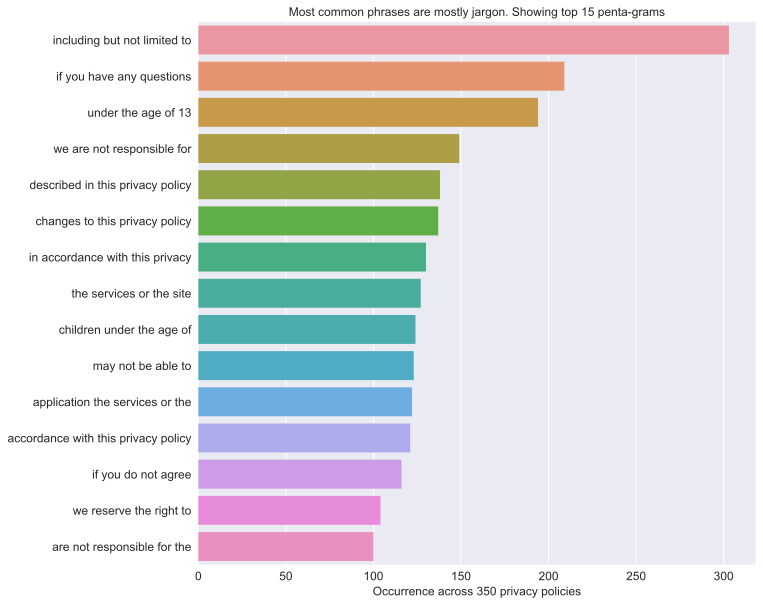

In [52]:
plt.figure(figsize=(10,10), dpi=400)
sns.barplot(x=y,y=x) # these are backwards because barplots have the axis for the dependent and independent variables swapped from their usual orientation 
plt.yticks(fontsize=12)
plt.xlabel("Occurrence across 350 privacy policies", fontsize=12)
plt.xticks(fontsize=12)
plt.title("Most common phrases are mostly jargon. Showing top 15 penta-grams")
plt.show()

As expected most of the phrases are legal jargon. 

One phrase to point out is "if you have any questions". I think this is a template line of text for privacy policies but it is helpful to offer users more information about such an opaque issue.

Another phrase of interest is "under the age of 13".  I there are laws affecting what companies can do with data on children under the age of 13, so these are often specified.

For comparison, tri-grams do not show any additional insights and tend to be a subset of the longer phrases.

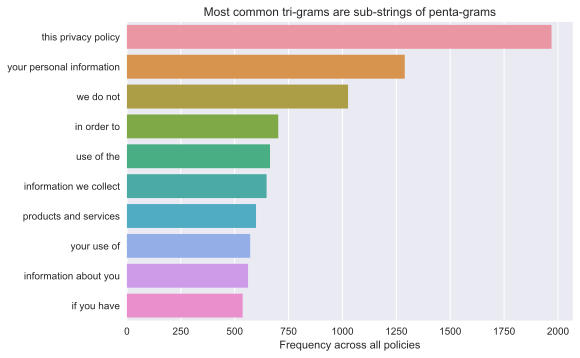

In [50]:
top_tri_grams = priv_pol_funcs.get_top_ngrams(all_segments_df['segment_text'], n=3)
trigram, trigram_freq = map(list, zip(*top_tri_grams))

sns.barplot(x=trigram_freq, y=trigram)
plt.title("Most common tri-grams are sub-strings of penta-grams")
plt.xlabel("Frequency across all policies")
plt.show()

---

# Distribution of targets in the data

This will be helpful for seeing how likelt we can be to predict different targets.

In [29]:
segment_annotations = pd.read_pickle('objects/segment_annotations.pkl')

In [30]:
annotation_segment_frequencies = segment_annotations.iloc[:,7:].sum() # Number of paragraphs with each annotation

## Frequency of concatenated targets

Firstly I will look at concatenated targets – these are annotations combining both the party (1st or 3rd party) and the practice.  These are helpful for how policies describe some specific actions – for example Contact_Email_Address_3rd_Party relates to how the company will share your email address with other companies and could increase your risk of receiving spam.

Story et al. didn't create classifiers to predict these 'concatenated' targets, instead creating classifiers to predict party and practice separately.  But it could be interesting to assess the potential for this and see when it would be more helpful to predict concatenated targets.

## Which party_practice annotations are most regularly applied?

These practices most regularly mentioned by companies tell us:
- Which practices we are most likely to find in any policy
- What practices most app companies do
- What concatenated targets we have the most data to use for predicting

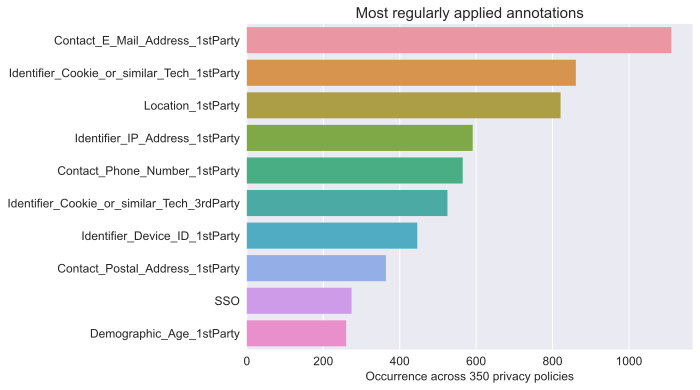

In [59]:
plt.figure(figsize=(8, 6), dpi=400)
# top 10 most regularly applied annotations
sns.barplot(x = annotation_segment_frequencies.sort_values(ascending=False)[:10].values, 
            y = annotation_segment_frequencies.sort_values(ascending=False)[:10].index)
plt.yticks(fontsize = 12)
plt.xlabel("Occurrence across 350 privacy policies", fontsize = 12)
plt.xticks(fontsize = 12)
plt.title("Most regularly applied annotations", fontsize = 15)
plt.show()

Contact email address and identifying cookies are not surprising as they are standard tools for companies to communicate with and track users. I am surprised by the number of mentions of location and phone number.

Location I should not be surprised by – I think most apps use it either to deliver their service or to tailor their offering to the country/region of the user.

Phone Number and Post Address both appear on this list, which I see as evidence that app companies take full contact details (email, address and telephone number). My impression of most apps is that these are not needed, but in reality I think we see this for two reasons:
- Many companies that offer a professional service will need these details from customers.  My impression of many apps on the app store was that they are games or small tools that would not require these, but I think I am mistaken.
- Many companies will mention these in their policies even if they do not collect them, because it is part of a standard privacy policy template and companies will want to cover their backs.

## How is the distribution of the frequencies of concatentated targets?

This will can help show how many of the concatenated targets we have enough data to predict.  I expect most targets to have a good representation since they were selected by Story et al. as data practices of interest.

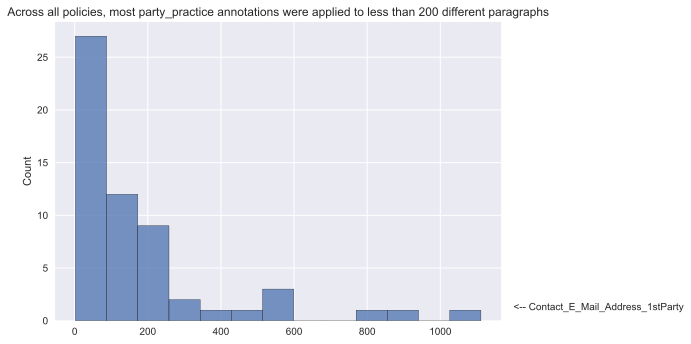

In [60]:
plt.figure()
# plt.hist(annotation_segment_frequencies, bins=20)
plt.title("Across all policies, most party_practice annotations were applied to less than 200 different paragraphs")

sns.histplot(annotation_segment_frequencies)
plt.text(1200, 1, "<-- Contact_E_Mail_Address_1stParty")
plt.show()

In actual fact, most of these concatenated annotations are only applied rarely across all policies.

Story et al. chose a wide range of practices to analyze, and describing how a company uses some specific practices with third parties is even rarer, so a lot of practices only feature a few times.

It will not be practical or particularly useful to aim to predict the rarer annotations.

On the back of this I will select a handful of targets that could be particularly important to predict.

## Focussing on just a few concatenated targets of interest – how many policies mention them?

Let's just look at a few to see how easily they could be predicted.

I have selected these 5 for being potentially important:

- Contact email 1st party – how the app company themselves uses the user's email – useful as a baseline to compare other practices to and the most common annotation, so applicable to almost all apps
- Contact email 3rd party – how the app company shares user's email with other parties, potentially opening the user up to marketing and spam they did not explicitly concent to
- Contact address book 1st party – Contact address book seems particularly important because this allows the company to access data about people who do not use the app (contacts of the user), who won't have concented to this.  I am looking at 1st party because there are too few annotations for *Contact address book 3rd party*.
- Contact postal address 3rd party – similar to *Contact email 3rd party* in terms of sharing information with other companies, but address is more risky from an identity theft point of view.
- Location 1st Party – It seems like great power for an app to track someone's location as from this they could determine a lot about them. Again I am selecting 1st party as there is more data available.

So do policies mention these annotations? I know from above that location and email are well represented but it will be interesting to see how many policies mention the others.

In [66]:
columns_of_interest = ['Contact_E_Mail_Address_1stParty', 'Contact_E_Mail_Address_3rdParty', 'Contact_Address_Book_1stParty', 
     'Contact_Postal_Address_3rdParty', 'Location_1stParty']
policies_have_annotations = segment_annotations.groupby('source_policy_number')[columns_of_interest].any()

In [67]:
pol_annot_props = policies_have_annotations.mean()*100

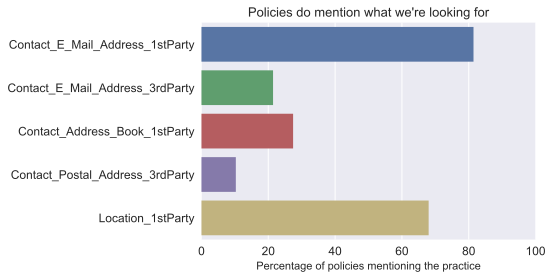

In [76]:
plt.figure(figsize=(6,4), dpi=400)
sns.barplot(x=pol_annot_props.values, y=pol_annot_props.index) 
plt.yticks(fontsize=12)
plt.xlabel("Percentage of policies mentioning the practice", fontsize=11)
plt.xticks(fontsize=12)
plt.xlim(0,100)
plt.title("Policies do mention what we're looking for", fontsize=13)
plt.show()

As expected, yes, email and location (1st party) are well represented. I am surprised that around a quarter of all app policies mention accessing the user's address book, as this seems unnecessarily intrusive.

The two 3rd party annotation frequencies will be in some part due to those apps that use external analytics service providers to process their data.

It also seems like it would be difficult to train a classifier to predict Postal Address 3rd Party since it is rarely featured.  I will test this in the next notebook.

Going deeper, it may be useful to see the most common specific phrases mentioned in segments with these concatenated targets.

---

## What are the phrases most associated with practices of interest?

These could be predictive of the practices and could be used as "crafted features".  These could also help us see how these practices tend to be described in policies, and what it is that companies do with this data.

I will start by looking at **Contact Address Book 1st party** because I am interested in how companies use this information.

First I will check just how many segments contain this annotation:

In [97]:
annotation_segment_frequencies["Contact_Address_Book_1stParty"]

219

Now to see the regularity of phrases:

In [92]:
top_5_quadragrams_one = priv_pol_funcs.get_top_ngrams(
    segment_annotations[segment_annotations['Contact_Address_Book_1stParty'] == 1]['segment_text'], 3, top_n = 12)

quadragrams, gram_frequencies = map(list, zip(*top_5_quadragrams_one))

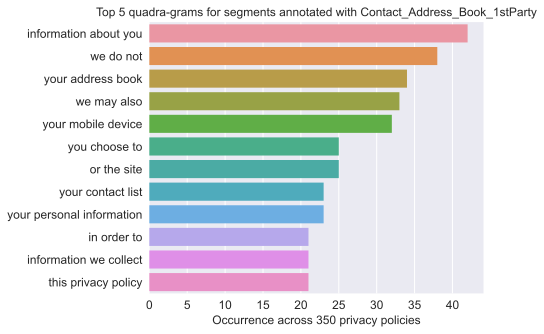

In [96]:
plt.figure(figsize=(6,5), dpi=400)
sns.barplot(x = gram_frequencies, y=quadragrams)
plt.yticks(fontsize = 12)
plt.xlabel("Occurrence across 350 privacy policies", fontsize = 12)
plt.xticks(fontsize = 12)
plt.title("Top 5 quadra-grams for segments annotated with Contact_Address_Book_1stParty")
plt.show()

Note that some of these negative phrases will have been added synthetically.

These top phrases rarely occur in more than 20 segments, around 10% of all segments with this annotation, so they are not clearly widespread and wouldn't be sufficient for predicting this target but could still help.

"your address book" and "your contact list" could be useful crafted features with some predictive value.

The others all seem too general to be useful.

I could continue this investigation with the other targets but will now shift my focus to the approach taken by Story et al., who don't use concatenated targets for training.

## Number of sentences with these annotations

Due to the low number of segments with these annotations, it could be better to train classifiers at the sentence level, which is something Story et al. said could lead to an improvement on their work.  For some reason, In Story et al.'s annotations, whenever they have annotated a segment, they also include annotations for each sentence in that segment, so I can use these to see the number of sentences with each annotation.

Please accept the large code blocks I wrote for breaking the annotations down to the sentence level.

In [100]:
list_of_practice_groups = priv_pol_funcs.get_list_of_practice_groups()
list_of_practices = [practice for practice_group in list_of_practice_groups for practice in practice_group]

29 different groups of practices returned, containing 58 individual practices.


In [101]:
row = 2 # initialise by starting at the second row

# create all sentences
# Creating a df at the sentence level by expanding the annotations
these_sentences = json_normalize(segment_annotations.at[row, 'sentences']) 

# Now appending all policy meta data to the sentences
these_sentences["source_policy_number"] = segment_annotations.at[row,"source_policy_number"] 
these_sentences["policy_type"] = segment_annotations.at[row,"policy_type"]
these_sentences["contains_synthetic"] = segment_annotations.at[row,"contains_synthetic"]
these_sentences["policy_segment_id"] = segment_annotations.at[row,"policy_segment_id"]
these_sentences = these_sentences[['source_policy_number', 'policy_type', 'contains_synthetic', 'policy_segment_id', 'sentence_text', 'annotations']]

# add to all_annot_sentence_df
all_annot_sentence_df = these_sentences.copy()
for row in range(len(segment_annotations)):
    next_sentences = 0
    if segment_annotations.loc[row, 'sentences'] != []:
        next_sentences = json_normalize(segment_annotations.at[row, 'sentences'])
        next_sentences["source_policy_number"] = segment_annotations.at[row,"source_policy_number"]
        next_sentences["policy_type"] = segment_annotations.at[row,"policy_type"]
        next_sentences["contains_synthetic"] = segment_annotations.at[row,"contains_synthetic"]
        next_sentences["policy_segment_id"] = segment_annotations.at[row,"policy_segment_id"]
        next_sentences = next_sentences[['source_policy_number', 'policy_type', 'contains_synthetic', 'policy_segment_id', 'sentence_text', 'annotations']]
        all_annot_sentence_df = pd.concat([all_annot_sentence_df, next_sentences], axis = 0)
all_annot_sentence_df.reset_index(drop=True, inplace=True)
print(f"The shape of the dataframe with annotated sentences is {all_annot_sentence_df.shape}")

# add the empty annotation columns
all_annot_sentence_df_annots = priv_pol_funcs.add_empty_annotation_columns(all_annot_sentence_df, list_of_practices)

# populate the columns with the annotations
for index in range(len(all_annot_sentence_df_annots)):
    practices_dictionaries = all_annot_sentence_df_annots.loc[index, 'annotations']
    for each_practice in practices_dictionaries:
        all_annot_sentence_df_annots.loc[index, each_practice['practice']] += 1

The shape of the dataframe with annotated sentences is (8398, 6)
The shape of the returned dataframe is (8398, 64)


Saving the dataframe for further use:

In [118]:
all_annot_sentence_df_annots.to_pickle('objects/all_annot_sentence_df_annots.pkl')

#verifying it saved and can be imported correctly; should return True
confirm_save = pd.read_pickle('objects/all_annot_sentence_df_annots.pkl')
print(all_annot_sentence_df_annots.shape == confirm_save.shape)
print(confirm_save.equals(all_annot_sentence_df_annots))

True
True


In [103]:
# Verify – most common annotations by sentence
all_annot_sentence_df_annots.iloc[:, 6:].sum().sort_values(ascending=False)[:5]

Identifier_Cookie_or_similar_Tech_1stParty    2118
Contact_E_Mail_Address_1stParty               2113
Location_1stParty                             1514
Identifier_Cookie_or_similar_Tech_3rdParty    1255
Identifier_IP_Address_1stParty                1013
dtype: int64

Sanity check: the most common annotations by sentence are similar to what we saw when looking at the segment level.

Now let's see whether we have enough sentences to predict the above mentioned 5 practices of interest.

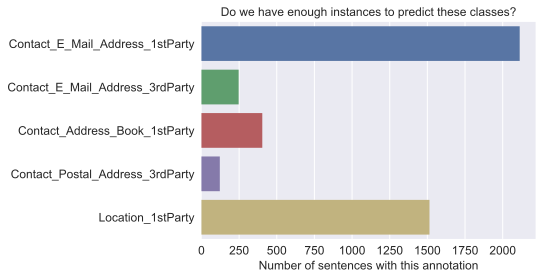

In [107]:
list_of_test_targets = ['Contact_E_Mail_Address_1stParty', 'Contact_E_Mail_Address_3rdParty', 
                        'Contact_Address_Book_1stParty', 'Contact_Postal_Address_3rdParty', 
                        'Location_1stParty']
sentences_with_those_annots = [2113, 247, 404, 122, 1514] 
# for some reason I hard-coded the values from all_annot_sentence_df_annots.iloc[:, 6:].sum()

plt.figure(figsize=(6,4), dpi=400)
sns.barplot(x = sentences_with_those_annots, y = list_of_test_targets)
plt.yticks(fontsize = 12)
plt.xlabel("Number of sentences with this annotation", fontsize = 12)
plt.xticks(fontsize = 12)
plt.title("Do we have enough instances to predict these classes?")
sns.despine()
plt.show()

Although there is clearly more data to use at the sentence level, I am still not confident that I would be able to make reliable classifiers having only 250-500 observations to work with.  While using sentences instead of segments can help, I think we need to train classifiers on each part of the annotation (party and practice separately) in order for them to be reliable, but I will test this in the next notebook.

---

# Conclusion

Firstly I looked at the metadata for each policy. 

What is the Train/Validate/Test split? This has been helpful to keep in mind when modelling. <br>
How many policies contain synthetic data? This has been helpful to interpret my findings and apply them to the domain.

The final two questions gave insights to the domain and acted as a sanity check for the data (How many paragraphs to policies tend to have? and How many characters do policies have?)

Then I looked at text aggregated across all policies:
- How many words do the segments have?
- What are the most common stopwords?
- What are the most common words?
- What are the most common phrases?

These all acted as helpful checks on the domain and our data, as well as a range of other insights.

Then I looked at the distribution of targets in the data:
- Frequency of concatenated targets
- Which party_practice annotations are most regularly applied?
- How is the distribution of the frequencies of concatentated targets?

This had helpful insights to modelling and gave a good understanding between the differences in the focus of annotations and the focus of most policy documents.

Then I looked at just a few concatenated targets of interest.
- How many policies mention them?
- What are the phrases most associated with practices of interest?
- Number of sentences with these annotations

These had further insights for modelling.

Further work should dig deeper into individual annotation types (party and practice targets separately), since that is how Story et al. did their modelling.

**EDA Evaluation**

Some of the purposes of EDA are to:
- summarize main features of data
- gain better understanding of the data set
- uncover relationships between variables
- detect outliers and anomalies

While I feel that I did most of these to some extent, there is much more that can be done around going into more depth in finding relationships between variables.  I have definitely found out more information about the domain and the data, and learned some things that can help build models.

---

# Appendix

## Wordcloud

A fun way to show themes in the text.  The wordcloud library has a more stringent stopwords list.

In this case we see a much greater number of app company names.

In [113]:
from wordcloud import WordCloud, STOPWORDS

In [114]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1 
        )
    
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12), dpi=300)
    plt.axis('off')
 
    plt.imshow(wordcloud)
    plt.show()
    
# code taken from neptune.ai again https://app.neptune.ai/neptune-ai/eda-nlp-tools/n/0-0-eda-nlp-million-headlines-f42d5ffd-0a6c-47f5-8cb8-bcddc93bf5e7/

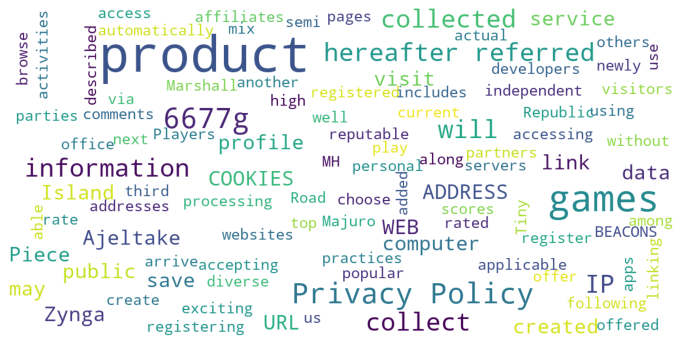

In [115]:
show_wordcloud(all_segments_df['segment_text'].values)

---

## Most frequent words taking into account term frequency and document frequency

Using tf-idf.  I can't see any additional insights so this is just included for comparison.

"tf-idf" stands for "term frequency-inverse document frequency". It is a weighting scheme – the tf-idf weight is used to evaluate how important a word is in a corpus. The importance increases proportionally to the number of times a word appears in each document (in this case a segment) but is offset by the frequency of the word in the corpus.

In [109]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [110]:
tfidf = TfidfVectorizer(min_df=5, stop_words=stopwords.words('english'))

tfidf.fit(all_segments_df['segment_text'])

X_transformed = tfidf.transform(all_segments_df['segment_text'])

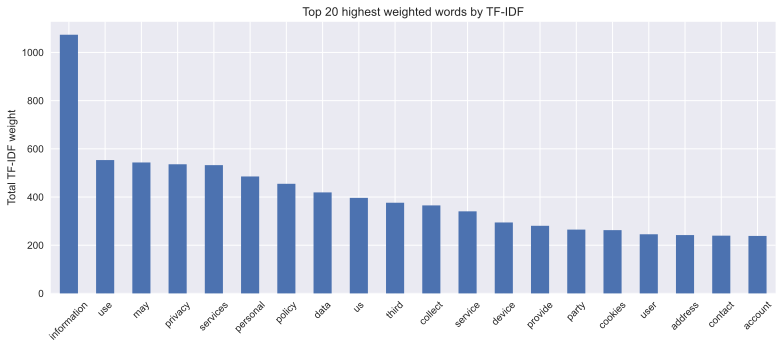

In [112]:
word_counts = pd.DataFrame(
    {"counts": X_transformed.toarray().sum(axis=0)},
    index=tfidf.get_feature_names_out()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(13, 5), legend=False)
plt.title("Top 20 highest weighted words by TF-IDF")
plt.ylabel("Total TF-IDF weight")
plt.xticks(rotation=45)
plt.show()

---